<a href="https://colab.research.google.com/github/botkin92/Mathstat/blob/lesson_7/Mathstat_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt

plt.style.use('seaborn-whitegrid')

### **Задача 1**

Дана матрица объект-признак

X = [[ 1.22401313, 2.30868478, 3.03636353, 2.69287214],
[-0.18757272, 1.30337355, 5.12093014, 3.46363202],
[-0.81094525, 1.82463398, 5.79686488, 1.86159445],
[ 0.75129018, 2.67392052, 3.65529809, 1.66746094],
[ 0.00972362, 1.97367255, 2.50594319, 1.69755173],
[-0.62972637, 0.77750764, 2.84124027, 4.54410559],
[ 2.29536229, 1.81206697, 1.95026215, 1.51874636],
[ 0.0920418 , 2.26971361, 7.47708735, 2.61081203],
[ 2.39252799, 3.17563985, 3.61420599, 5.10773362],
[ 0.54983815, 2.87988651, 1.65752765, 1.59635987]]

и значения целевой переменной

y = [ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108,
7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218]

1. Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат.
2. Является ли значимым получившееся уравнение регрессии?

In [2]:
X = np.array([[ 1.22401313, 2.30868478, 3.03636353, 2.69287214], [-0.18757272, 1.30337355, 5.12093014, 3.46363202], [-0.81094525, 1.82463398, 5.79686488, 1.86159445], [ 0.75129018, 2.67392052, 3.65529809, 1.66746094], [ 0.00972362, 1.97367255, 2.50594319, 1.69755173], [-0.62972637, 0.77750764, 2.84124027, 4.54410559], [ 2.29536229, 1.81206697, 1.95026215, 1.51874636], [ 0.0920418 , 2.26971361, 7.47708735, 2.61081203], [ 2.39252799, 3.17563985, 3.61420599, 5.10773362], [ 0.54983815, 2.87988651, 1.65752765, 1.59635987]])

In [3]:
X.shape

(10, 4)

In [4]:
y = np.array([9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108, 7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218])

In [5]:
dataset = pd.DataFrame(X)

In [6]:
def my_linear_model(X, ind1, ind2, trg):
  new_X = X[[ind1, ind2]].values
  # Добавление единичного столбца
  ones = np.ones((X.shape[0], 1))
  new_X = np.hstack((ones, new_X))
  # Поиск коэф. b методом наименьших квадратов
  XTX = new_X.T.dot(new_X)
  XTX_inv = np.linalg.inv(XTX)
  b = XTX_inv.dot(new_X.T).dot(trg)
  # Расчет коэффициента детерминации
  z = new_X.dot(b)
  sum_of_squares = ((trg - trg.mean()) ** 2).sum()
  R2 = 1 - ((trg - z)**2).sum() / sum_of_squares

  return print(f'Определитель матрицы XTX: {np.linalg.det(XTX)}\nКоэффициенты b: {b}\nКоэффициент детерминации R2: {R2}')

In [7]:
my_linear_model(dataset, 0, 1, y)

Определитель матрицы XTX: 349.7782033818847
Коэффициенты b: [6.70781579 0.40786841 1.03360247]
Коэффициент детерминации R2: 0.18113594742585215


In [8]:
my_linear_model(dataset, 0, 2, y)

Определитель матрицы XTX: 2835.3600226240965
Коэффициенты b: [3.62455695 1.62531203 1.21134979]
Коэффициент детерминации R2: 0.7634246238793151


In [9]:
my_linear_model(dataset, 0, 3, y)

Определитель матрицы XTX: 1689.2124743606082
Коэффициенты b: [5.70686123 0.68359949 1.12650707]
Коэффициент детерминации R2: 0.4532966783144079


In [10]:
my_linear_model(dataset, 1, 2, y)

Определитель матрицы XTX: 1427.8125776081495
Коэффициенты b: [2.48896193 1.60611956 0.86269915]
Коэффициент детерминации R2: 0.547948273403901


In [11]:
my_linear_model(dataset, 1, 3, y)

Определитель матрицы XTX: 701.732736445317
Коэффициенты b: [1.91685221 1.74373667 1.31971882]
Коэффициент детерминации R2: 0.6062055761129932


In [12]:
my_linear_model(dataset, 2, 3, y)

Определитель матрицы XTX: 4547.328074863321
Коэффициенты b: [3.64001086 0.70753914 1.04851745]
Коэффициент детерминации R2: 0.6224419876505324


Модель с первым и третьим признаками дают наилучший результат (R2 - 0.76)

Проверка статистического уровня значимости:

In [13]:
n = X.shape[0]
m = 2

k1 = m
k2 = n - m - 1

k1, k2

(2, 7)

In [14]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

4.73741412777588

Критическая область:
$$\Omega_\alpha = \left( 4.96, \infty \right)$$

In [15]:
F = (0.7634 / k1) / ((1 - 0.7634) / k2)
F

11.292899408284022

Статистика попала в критическую область, уравнение регрессии признаётся значимым.

### **Задача 2**

Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):

salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

Возьмём в качестве признака значение salary, а в качестве целевой переменной - scoring.

Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
Посчитайте коэффициент детерминации.
Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
(доп) Посчитать среднюю ошибку аппроксимации

In [16]:
salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

Коэффициенты линейной регрессии с помощью формул для парной регрессии:

In [17]:
b1 = (np.mean(salary * scoring) - np.mean(salary) * np.mean(scoring)) / (np.mean(salary ** 2) - np.mean(salary) ** 2)
b0 = np.mean(scoring) - b1 * np.mean(salary)

b0, b1

(444.1773573243596, 2.620538882402765)

Коэффициенты линейной регрессии с помощью метода наименьших квадратов:

In [18]:
ones = np.ones((10))
X = np.column_stack((ones, salary))

In [19]:
XTX = X.T.dot(X)
np.linalg.det(XTX)

349464.00000000023

In [20]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(X.T).dot(scoring)
print(b)

[444.17735732   2.62053888]


График:

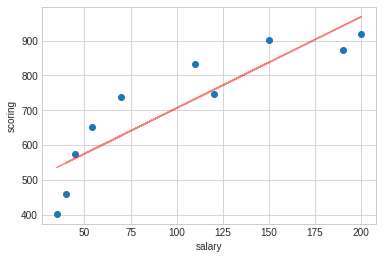

In [21]:
ox = salary
oy = b0 + b1 * ox

plt.scatter(salary, scoring)
plt.plot(ox, oy, color='red', alpha=0.5)

plt.xlabel('salary')
plt.ylabel('scoring');

Коэффициент детерминации R2:

In [22]:
z = b0 + b1 * salary
sum_of_squares = ((scoring - scoring.mean()) ** 2).sum()
R2 = 1 - ((scoring - z)**2).sum() / sum_of_squares
R2

0.7876386635293686

Проверка статистического уровня значимости:

In [23]:
n = salary.shape[0]
m = 1

k1 = m
k2 = n - m - 1

k1, k2

(1, 8)

In [24]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

5.317655071578714

Критическая область:
$$\Omega_\alpha = \left( 5.32, \infty \right)$$

In [25]:
F = (R2 / k1) / ((1 - R2) / k2)
F

29.67164085966451

Статистика попала в критическую область, уравнение регрессии признаётся значимым.